In [100]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)


In [101]:
# Data product_info
product_info = pd.read_csv('../data/product_info.csv')
product_info.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0


In [102]:
# Data reviews -- merge together datasets into a single one
reviews1 = pd.read_csv('../data/reviews_0-250.csv', dtype={'author_id':'str'})
reviews2 = pd.read_csv('../data//reviews_250-500.csv')
reviews3 = pd.read_csv('../data/reviews_500-750.csv')
reviews4 = pd.read_csv('../data/reviews_750-1250.csv', dtype={'author_id':'str'})
reviews5 = pd.read_csv('../data/reviews_1250-end.csv', dtype={'author_id':'str'})

reviews_df = pd.concat([reviews1, reviews2, reviews3, reviews4, reviews5], axis = 0)
reviews_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [103]:
print(product_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [104]:
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982854 n

In [105]:
print(f'display product_info')
display(product_info.describe())
print(f'\ndisplay reviews_df')
display(reviews_df.describe())

display product_info


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000



display reviews_df


,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06
mean,1.989864e+05,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01
std,1.749886e+05,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,5.590600e+04,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,1.308240e+05,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,3.285265e+05,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01
max,6.021290e+05,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03


In [106]:
# Shape of the datasets
product_info.shape, reviews_df.shape

((8494, 27), (1094411, 19))

## Data Cleaning and EDA

### product_info

In [107]:
# Missing values in product_info
product_info.isnull().sum().to_frame(name='missing_count').assign(missing_percent=lambda x: 100 * x['missing_count'] / len(product_info)).sort_values(by='missing_count', ascending=False)

,missing_count,missing_percent
sale_price_usd,8224,96.821286
value_price_usd,8043,94.690370
variation_desc,7244,85.283730
child_max_price,5740,67.577113
child_min_price,5740,67.577113
highlights,2207,25.983047
size,1631,19.201789
variation_value,1598,18.813280
variation_type,1444,17.000235
tertiary_category,990,11.655286


In [108]:
# Drop columns with many missing values
product_info.drop(columns = ['sale_price_usd', 'value_price_usd', 'variation_desc', 'child_max_price', 'child_min_price', 'highlights', 'size', 'variation_value', 'variation_type'], inplace=True)


In [109]:
product_info.isnull().sum()

product_id              0
product_name            0
brand_id                0
brand_name              0
loves_count             0
rating                278
reviews               278
ingredients           945
price_usd               0
limited_edition         0
new                     0
online_only             0
out_of_stock            0
sephora_exclusive       0
primary_category        0
secondary_category      8
tertiary_category     990
child_count             0
dtype: int64

In [110]:
# Itentify rows with missing values in tertiary_category
product_info[product_info['tertiary_category'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category,tertiary_category,child_count
15,P476418,African Beauty Butter Mini Gift Set,6471,54 Thrones,7526,3.5610,41.0,"['Egyptian Lavender + Moroccan Mint:', 'Butyro...",29.0,0,0,1,1,1,Bath & Body,Value & Gift Sets,NaN,0
16,P476417,African Beauty Butter Collection Deluxe Tin,6471,54 Thrones,3741,4.2273,22.0,"['Egyptian Lavender + Moroccan Mint:', 'Butyro...",80.0,0,0,1,0,0,Bath & Body,Value & Gift Sets,NaN,0
31,P443401,Blu Mediterraneo Mini Eau de Toilette Set,5847,Acqua di Parma,7290,3.3333,12.0,"['Arancia di Capri Eau de Toilette:', 'Alcohol...",77.0,0,0,1,0,0,Mini Size,Fragrance,NaN,0
58,P473150,Mini Baomint Deep Conditioning Treatment,6321,adwoa beauty,4562,4.2000,5.0,"['Water (Aqua), Butyrospermum Parkii (Shea But...",15.0,0,0,1,0,1,Hair,Mini Size,NaN,0
59,P473151,Mini Baomint Deluxe Travel Kit,6321,adwoa beauty,4559,4.7283,173.0,"['Baomint Moisturizing Shampoo:', 'Water (Aqua...",56.0,0,0,1,1,1,Hair,Value & Gift Sets,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,P473336,The Youth System,6169,Youth To The People,53522,4.5526,76.0,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",59.0,0,0,0,0,0,Skincare,Value & Gift Sets,NaN,0
8424,P501474,The Youth Vault: 13-Piece Vegan Skincare + App...,6169,Youth To The People,8989,4.8750,8.0,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",340.0,1,0,1,0,1,Skincare,Value & Gift Sets,NaN,0
8425,P502998,"Youth Stacks: Plump It Up for Dry, Dehydrated ...",6169,Youth To The People,10406,4.1667,6.0,"['Triple Peptide + Cactus Oasis Serum:', 'Wate...",28.0,0,0,0,0,0,Skincare,Value & Gift Sets,NaN,0
8427,P502977,Youth Stacks: Daily Skin Health Your Way for P...,6169,Youth To The People,13592,4.2500,4.0,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",20.0,1,0,0,0,0,Skincare,Value & Gift Sets,NaN,0


In [111]:
# Replace missing values with the mode secondary_category for each primary_category
mode_map = (
    product_info
    .dropna(subset=['secondary_category'])   
    .groupby('primary_category')['secondary_category'] 
    .agg(lambda x: x.mode().iloc[0])
)

def impute_tertiary(row):
    if pd.isnull(row['secondary_category']):
        return mode_map.get(row['primary_category'], row['primary_category'])
    else:
        return row['secondary_category']
    
product_info['secondary_category'] = product_info.apply(impute_tertiary, axis=1)

In [112]:
# Replace missing values with the mode tertiary_category for each secondary_category
mode_map = (
    product_info
    .dropna(subset=['tertiary_category'])   
    .groupby('secondary_category')['tertiary_category'] 
    .agg(lambda x: x.mode().iloc[0])
)

def impute_tertiary(row):
    if pd.isnull(row['tertiary_category']):
        return mode_map.get(row['secondary_category'], row['secondary_category'])
    else:
        return row['tertiary_category']
    
product_info['tertiary_category'] = product_info.apply(impute_tertiary, axis=1)

In [113]:
product_info.isnull().sum()

product_id              0
product_name            0
brand_id                0
brand_name              0
loves_count             0
rating                278
reviews               278
ingredients           945
price_usd               0
limited_edition         0
new                     0
online_only             0
out_of_stock            0
sephora_exclusive       0
primary_category        0
secondary_category      0
tertiary_category       0
child_count             0
dtype: int64

In [114]:
# Drop null values
product_info.dropna(axis=0, inplace=True)
product_info.shape

(7322, 18)

In [115]:
## Change the data type of reviews column to int.
product_info['reviews'] = product_info['reviews'].astype(int)
product_info['loves_count'] = product_info['loves_count'].astype(int)

In [116]:
## change column values to lower case
product_info['product_name'] = product_info['product_name'].str.lower().str.strip()

### reviews

In [117]:
# Missing values in reviews_df
reviews_df.isnull().sum().to_frame(name='missing_count').assign(missing_percent=lambda x: 100 * x['missing_count'] / len(reviews_df)).sort_values(by='missing_count', ascending=False)

,missing_count,missing_percent
helpfulness,561592,51.314543
review_title,310654,28.385497
hair_color,226768,20.720552
eye_color,209628,19.154413
skin_tone,170539,15.582720
is_recommended,167988,15.349626
skin_type,111557,10.193337
review_text,1444,0.131943
rating,0,0.000000
Unnamed: 0,0,0.000000


In [118]:
# Drop columns with many missing values
reviews_df.drop(columns = ['Unnamed: 0', 'helpfulness', 'review_title', 'hair_color', 'eye_color'], inplace=True)


In [119]:
reviews_df.isnull().sum()

author_id                        0
rating                           0
is_recommended              167988
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
skin_tone                   170539
skin_type                   111557
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [120]:
# Drop null values
reviews_df.dropna(axis=0, inplace=True)
reviews_df.shape

(883097, 14)

In [122]:
## Change data time data types
reviews_df['submission_time'] = pd.to_datetime(reviews_df['submission_time'], errors='coerce')

In [123]:
## change column values to lower case
reviews_df['skin_tone'] = reviews_df['skin_tone'].str.lower().str.strip()
reviews_df['brand_name'] = reviews_df['brand_name'].str.lower().str.strip()
reviews_df['product_name'] = reviews_df['product_name'].str.lower().str.strip()

In [124]:
# Remove duplicates
reviews_df.drop_duplicates(inplace=True)
product_info.drop_duplicates(inplace=True)

In [126]:
product_info.shape, reviews_df.shape

((7322, 18), (882967, 14))

In [128]:
# Save as df
product_info.to_csv('../data/product_info_df.csv', index=False)
reviews_df.to_csv('../data/reviews_df.csv', index=False)

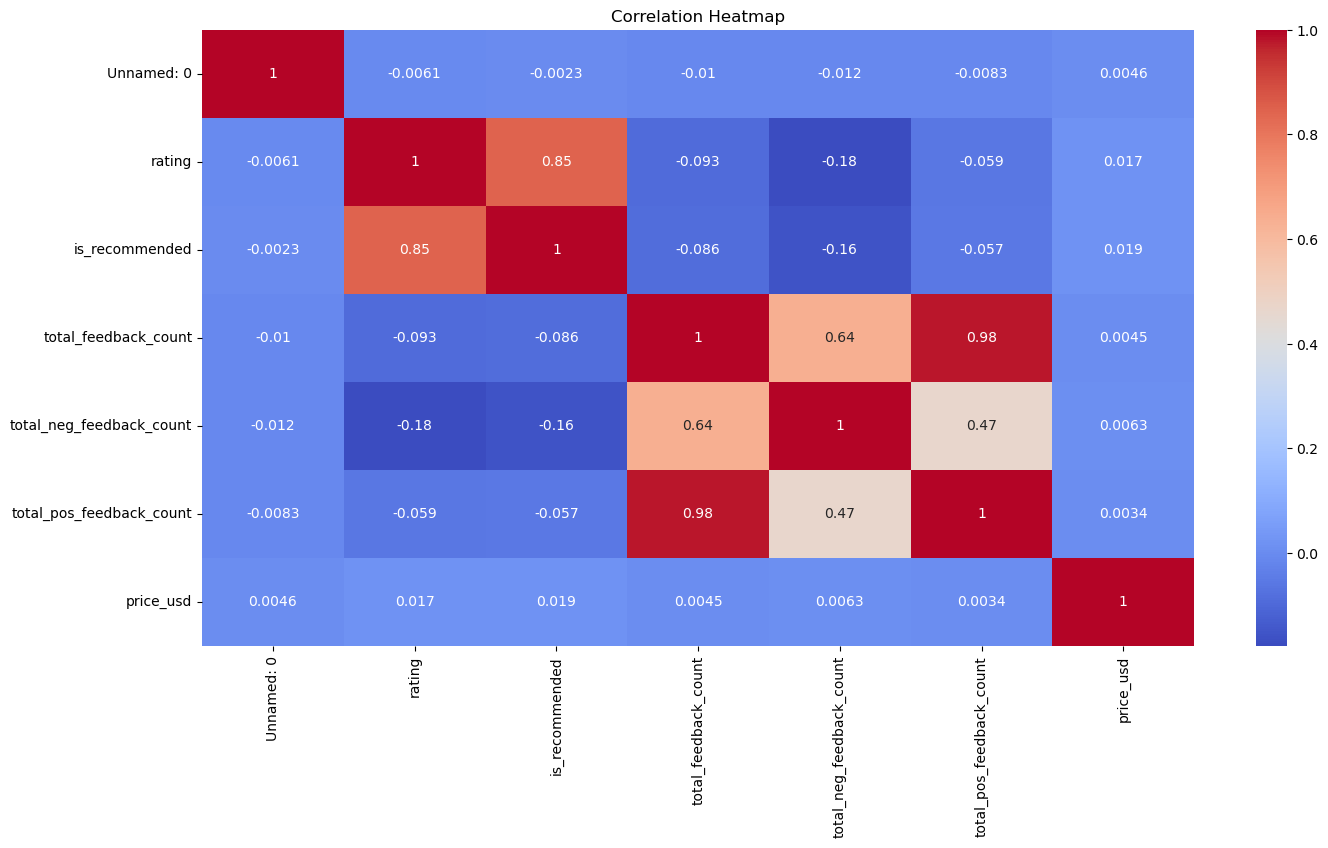

In [58]:
# Correlation of reviews
plt.figure(figsize=(16, 8))
sns.heatmap(reviews_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

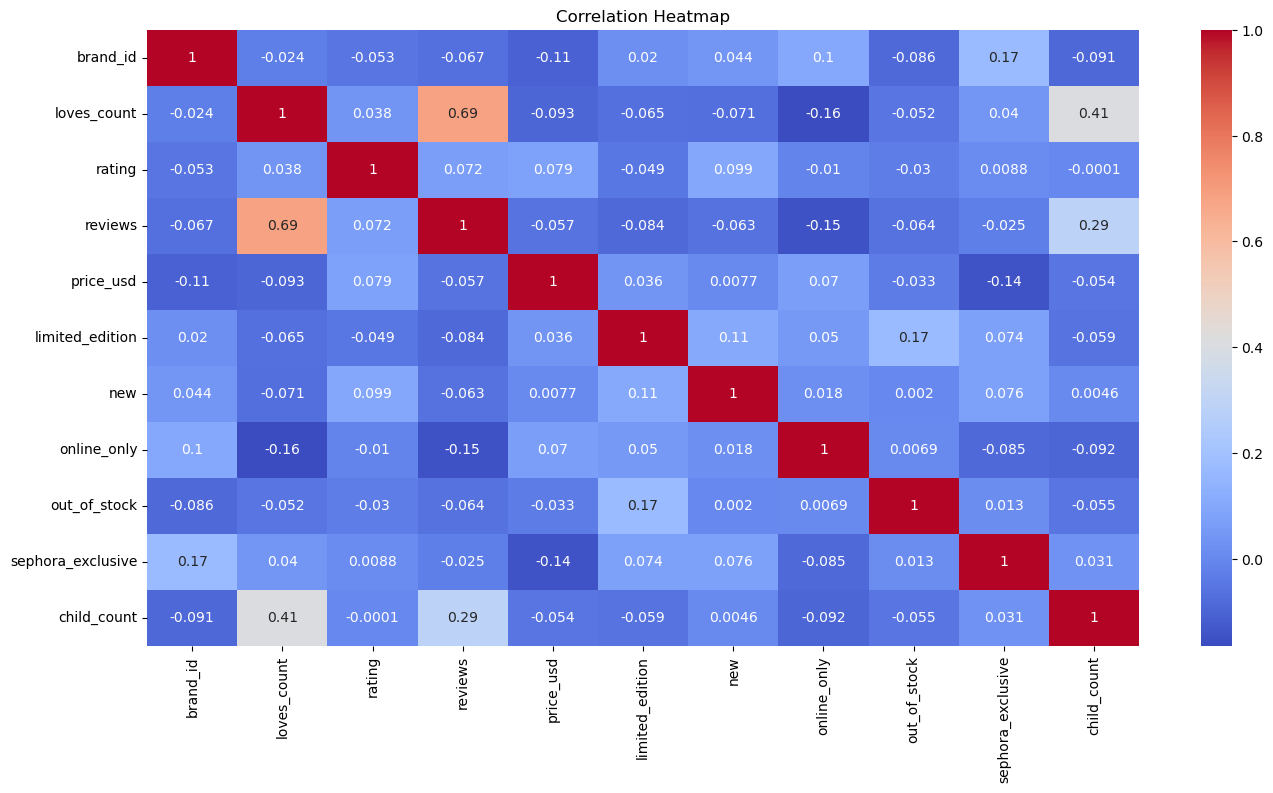

In [59]:
# Correlation of product_info
plt.figure(figsize=(16, 8))
sns.heatmap(product_info.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()